## Optimization with a mix of continuous and discrete variables

Populating the interactive namespace from numpy and matplotlib
-----
----- Running demo. It may take a few seconds.
-----
*Optimization completed:


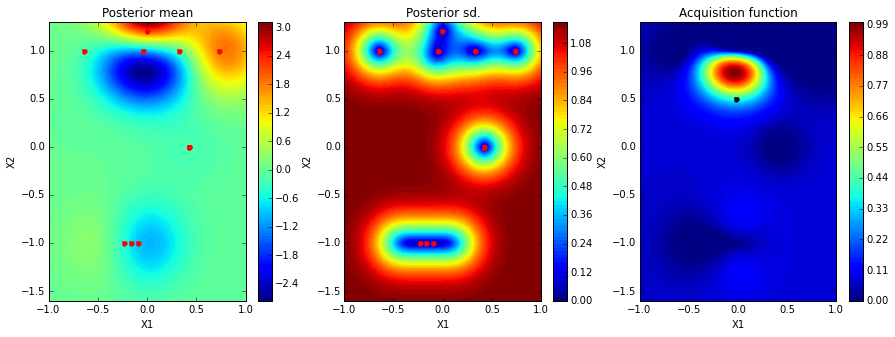

In [5]:
%pylab inline
import GPyOpt
from numpy.random import seed
seed(1234)
        
# --- Fucntion to optimize
func  = GPyOpt.objective_examples.experiments2d.sixhumpcamel() 
#func  = GPyOpt.objective_examples.experiments1d.forrester() 

# --- Space design
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
                                    {'name': 'var_2', 'type': 'discrete', 'domain': (-1.5,-1,0,.5,1, 1.2)}])

# --- Objective
objective = GPyOpt.core.task.SingleObjective(func.f)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, space, optimizer=aquisition_optimizer)

# --- CHOOSE a collection method
collection_method = GPyOpt.core.batch_designs.Sequential(acquisition,1)

# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)

# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, collection_method, initial_design)


print '-----'
print '----- Running demo. It may take a few seconds.'
print '-----'

# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 
bo.plot_acquisition()

In [1]:
bo.objective.cost(initial_design)

NameError: name 'bo' is not defined

In [8]:
initial_design * np.zeros((5,1))

array([[-0.,  0.],
       [-0., -0.],
       [ 0.,  0.],
       [-0.,  0.],
       [-0.,  0.]])

In [4]:
space